<a href="https://colab.research.google.com/github/soumyajt1991/Topic-Modeling-on-News-Articles/blob/main/Soumyajit_Das_Team_3_Topic_Modeling_on_News_Articles_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)


In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import string
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
news=[]
topics=[]

path="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 1/bbc/"

folders=['business','entertainment','politics','sport','tech'] 

for i in folders:
    all_files=os.listdir(path+i)
    for txt_files in all_files:
        files_path=path+i+'/'+txt_files
        with open(files_path,'rb') as f:
            text=f.read()
        news.append(text)
        topics.append(i)

bbc = {'news':news,'topics':topics}
bbc = pd.DataFrame(bbc)

In [4]:
bbc.head()

,news,topics
0,"b'India calls for fair trade rules\n\nIndia, w...",business
1,"b'Steel firm \'to cut\' 45,000 jobs\n\nMittal ...",business
2,b'Call centre users \'lose patience\'\n\nCusto...,business
3,b'Ethiopia\'s crop production up 24%\n\nEthiop...,business
4,"b""Safety alert as GM recalls cars\n\nThe world...",business


In [12]:
bbc.shape

(2225, 2)

In [28]:
bbc.news[0]

b'India calls for fair trade rules\n\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.\n\nIn London on Thursday ahead of the meeting, India\'s finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.\n\nPalaniappan Chidambaram, India\'s finance minister, argued that these organisations need to take into account the changing world order, given India and China\'s integration into the global economy. He said the issue is not globalisation but "the terms of engagement in globalisation." Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world\'s population. At a conference on developing enterprise hosted by UK finance minister Gordon Brown

In [13]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   topics  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [14]:
bbc.describe(include='all').T

,count,unique,top,freq
news,2225,2127,b'Brown outlines third term vision\n\nGordon B...,2
topics,2225,5,sport,511


In [5]:
len(bbc[bbc.duplicated()])

98

In [6]:
# removing duplicate observations
bbc=bbc.drop_duplicates()

In [17]:
bbc.shape

(2127, 2)

In [ ]:
bbc.topics.value_counts()

3    511
0    510
2    417
4    401
1    386
Name: label, dtype: int64

In [20]:
bbc.topics.value_counts(normalize=True)*100

sport            23.742360
business         23.648331
politics         18.946874
entertainment    17.348378
tech             16.314057
Name: topics, dtype: float64

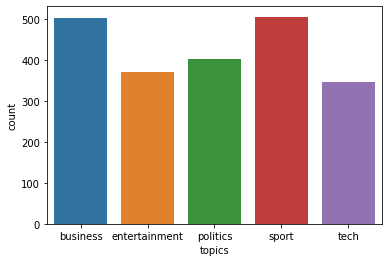

In [25]:
import warnings 
warnings.filterwarnings("ignore")
sns.countplot(bbc['topics'], data=bbc)
plt.show()

In [7]:
bbc1=bbc.copy()

In [8]:
# creating a column 'length' for total length of strings in each message
bbc1['length']=bbc1['news'].apply(len)

In [36]:
bbc1.head()

,news,topics,length
0,"b'India calls for fair trade rules\n\nIndia, w...",business,1922
1,"b'Steel firm \'to cut\' 45,000 jobs\n\nMittal ...",business,1620
2,b'Call centre users \'lose patience\'\n\nCusto...,business,3854
3,b'Ethiopia\'s crop production up 24%\n\nEthiop...,business,1494
4,"b""Safety alert as GM recalls cars\n\nThe world...",business,1829


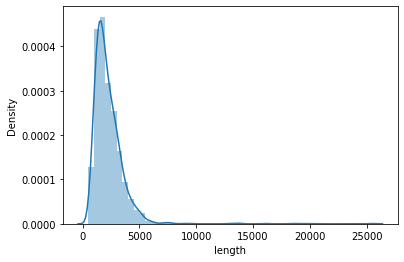

In [41]:
# distplot
sns.distplot(bbc1['length'])
plt.show()

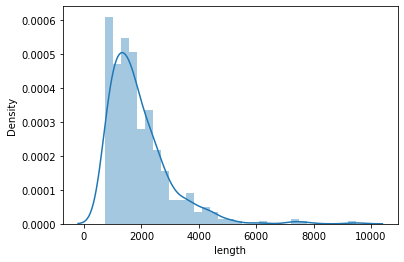

In [58]:
# distplot
bbc1_sport=bbc1[bbc1.topics=='sport']
sns.distplot(bbc1_sport['length'])
plt.show()

In [9]:
bbc1['news'] = bbc1['news'].astype('str') 

In [82]:
# removing punctutations

In [10]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [11]:
bbc1['news'] = bbc1['news'].apply(remove_punctuation)
bbc1.news[0]

'bIndia calls for fair trade rulesnnIndia which attends the G7 meeting of seven leading industrialised nations on Friday is unlikely to be cowed by its newcomer statusnnIn London on Thursday ahead of the meeting Indias finance minister lashed out at the restrictive trade policies of the G7 nations He objected to subsidies on agriculture that make it hard for developing nations like India to compete He also called for reform of the United Nations the World Bank and the IMFnnPalaniappan Chidambaram Indias finance minister argued that these organisations need to take into account the changing world order given India and Chinas integration into the global economy He said the issue is not globalisation but the terms of engagement in globalisation Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations which account for two thirds of the worlds population At a conference on developing enterprise hosted by UK finance minister Gordon Brown on Friday he said that he was i

In [12]:
len(bbc1.news[0])

1870

In [13]:
# removing stopwords

In [14]:
stop_words = stopwords.words('english')

In [15]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [wd.lower() for wd in text.split() if wd.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [16]:
bbc1['news'] = bbc1['news'].apply(stopwords)
bbc1.news[0]

'bindia calls fair trade rulesnnindia attends g7 meeting seven leading industrialised nations friday unlikely cowed newcomer statusnnin london thursday ahead meeting indias finance minister lashed restrictive trade policies g7 nations objected subsidies agriculture make hard developing nations like india compete also called reform united nations world bank imfnnpalaniappan chidambaram indias finance minister argued organisations need take account changing world order given india chinas integration global economy said issue globalisation terms engagement globalisation mr chidambaram attending g7 meeting part g20 group nations account two thirds worlds population conference developing enterprise hosted uk finance minister gordon brown friday said favour floating exchange rates help countries cope economic shocks flexible exchange rate one channel absorbing positive negative shocks told conference india along china brazil south africa russia invited take part g7 meeting taking place londo

In [17]:
len(bbc1.news[0])

1395

In [18]:
# stemming

In [20]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [21]:
bbc1['news'] = bbc1['news'].apply(stemming)
bbc1.news[0]

'bindia call fair trade rulesnnindia attend g7 meet seven lead industrialis nation friday unlik cow newcom statusnnin london thursday ahead meet india financ minist lash restrict trade polici g7 nation object subsidi agricultur make hard develop nation like india compet also call reform unit nation world bank imfnnpalaniappan chidambaram india financ minist argu organis need take account chang world order given india china integr global economi said issu globalis term engag globalis mr chidambaram attend g7 meet part g20 group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday said favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock told confer india along china brazil south africa russia invit take part g7 meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g7 nation particular us blame surg cheap chines export countri tri use 

In [22]:
len(bbc1.news[0])

1215

In [23]:
bbc1['final_length']=bbc1['news'].apply(len)
bbc1.head()

,news,topics,length,final_length
0,bindia call fair trade rulesnnindia attend g7 ...,business,1922,1215
1,bsteel firm cut 45000 jobsnnmitt steel one wor...,business,1620,1048
2,bcall centr user lose patiencenncustom tri get...,business,3854,2259
3,bethiopia crop product 24nnethiopia produc 142...,business,1494,1025
4,bsafeti alert gm recal carsnnth world biggest ...,business,1829,1223


In [24]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

In [30]:
bbc1_business.head()

,news,topics,length,final_length
0,bindia call fair trade rulesnnindia attend g7 ...,business,1922,1215
1,bsteel firm cut 45000 jobsnnmitt steel one wor...,business,1620,1048
2,bcall centr user lose patiencenncustom tri get...,business,3854,2259
3,bethiopia crop product 24nnethiopia produc 142...,business,1494,1025
4,bsafeti alert gm recal carsnnth world biggest ...,business,1829,1223


(array([12., 14., 17., 15., 27., 22., 34., 26., 33., 21., 29., 31., 21.,
        30., 14., 14., 14., 13., 16.,  9., 12.,  8.,  9.,  8., 11.,  4.,
         3.,  3.,  2.,  4.,  4.,  2.,  2.,  1.,  1.,  1.,  0.,  0.,  1.,
         2.,  5.,  0.,  2.,  0.,  2.,  1.,  0.,  0.,  1.,  2.]),
 array([ 563.  ,  618.52,  674.04,  729.56,  785.08,  840.6 ,  896.12,
         951.64, 1007.16, 1062.68, 1118.2 , 1173.72, 1229.24, 1284.76,
        1340.28, 1395.8 , 1451.32, 1506.84, 1562.36, 1617.88, 1673.4 ,
        1728.92, 1784.44, 1839.96, 1895.48, 1951.  , 2006.52, 2062.04,
        2117.56, 2173.08, 2228.6 , 2284.12, 2339.64, 2395.16, 2450.68,
        2506.2 , 2561.72, 2617.24, 2672.76, 2728.28, 2783.8 , 2839.32,
        2894.84, 2950.36, 3005.88, 3061.4 , 3116.92, 3172.44, 3227.96,
        3283.48, 3339.  ]),
 <a list of 50 Patch objects>)

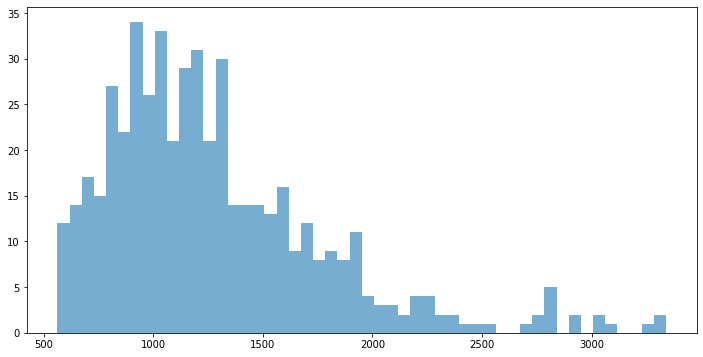

In [33]:
plt.hist(bbc1_business['final_length'], alpha = 0.6, bins=50, label='business')

(array([ 46., 125.,  75.,  41.,  24.,  13.,  14.,  15.,   5.,   3.,   2.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  544.  ,   759.64,   975.28,  1190.92,  1406.56,  1622.2 ,
         1837.84,  2053.48,  2269.12,  2484.76,  2700.4 ,  2916.04,
         3131.68,  3347.32,  3562.96,  3778.6 ,  3994.24,  4209.88,
         4425.52,  4641.16,  4856.8 ,  5072.44,  5288.08,  5503.72,
         5719.36,  5935.  ,  6150.64,  6366.28,  6581.92,  6797.56,
         7013.2 ,  7228.84,  7444.48,  7660.12,  7875.76,  8091.4 ,
         8307.04,  8522.68,  8738.32,  8953.96,  9169.6 ,  9385.24,
         9600.88,  9816.52, 10032.16, 10247.8 , 10463.44, 10679.08,
        10894.72, 11110.36, 11326.  ]),
 <a list of 50 Patch objects>)

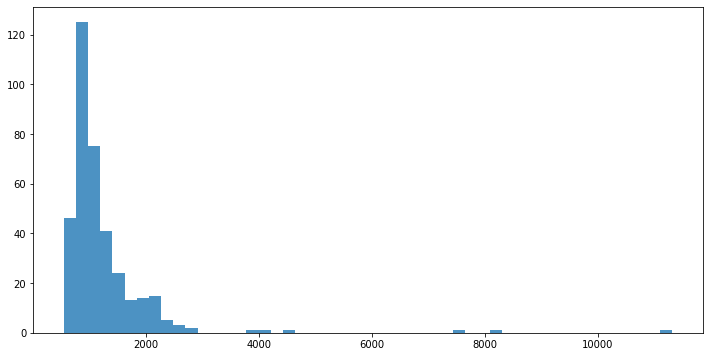

In [35]:
plt.hist(bbc1_entertainment['final_length'], alpha = 0.8, bins=bins, label='entertainment')

(array([ 4., 36., 61., 57., 84., 82., 44., 21.,  7.,  1.,  1.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  312. ,   597.9,   883.8,  1169.7,  1455.6,  1741.5,  2027.4,
         2313.3,  2599.2,  2885.1,  3171. ,  3456.9,  3742.8,  4028.7,
         4314.6,  4600.5,  4886.4,  5172.3,  5458.2,  5744.1,  6030. ,
         6315.9,  6601.8,  6887.7,  7173.6,  7459.5,  7745.4,  8031.3,
         8317.2,  8603.1,  8889. ,  9174.9,  9460.8,  9746.7, 10032.6,
        10318.5, 10604.4, 10890.3, 11176.2, 11462.1, 11748. , 12033.9,
        12319.8, 12605.7, 12891.6, 13177.5, 13463.4, 13749.3, 14035.2,
        14321.1, 14607. ]),
 <a list of 50 Patch objects>)

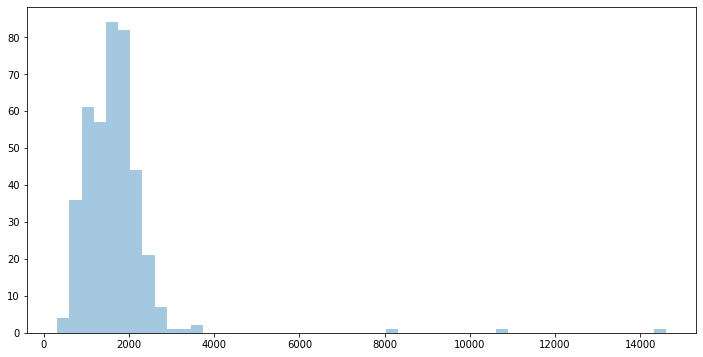

In [36]:
plt.hist(bbc1_politics['final_length'], alpha = 0.4, bins=bins, label='politics')

(array([36., 52., 47., 62., 44., 57., 34., 32., 14., 20., 22., 12., 11.,
        12.,  6.,  4.,  7.,  5.,  6.,  4.,  4.,  5.,  0.,  0.,  3.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 428. ,  540.3,  652.6,  764.9,  877.2,  989.5, 1101.8, 1214.1,
        1326.4, 1438.7, 1551. , 1663.3, 1775.6, 1887.9, 2000.2, 2112.5,
        2224.8, 2337.1, 2449.4, 2561.7, 2674. , 2786.3, 2898.6, 3010.9,
        3123.2, 3235.5, 3347.8, 3460.1, 3572.4, 3684.7, 3797. , 3909.3,
        4021.6, 4133.9, 4246.2, 4358.5, 4470.8, 4583.1, 4695.4, 4807.7,
        4920. , 5032.3, 5144.6, 5256.9, 5369.2, 5481.5, 5593.8, 5706.1,
        5818.4, 5930.7, 6043. ]),
 <a list of 50 Patch objects>)

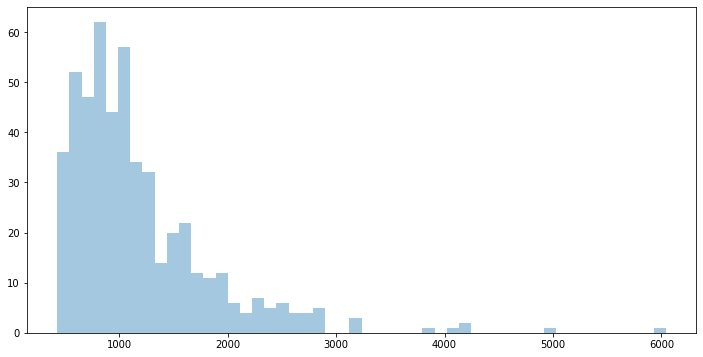

In [37]:
plt.hist(bbc1_sport['final_length'], alpha = 0.4, bins=bins, label='sport')

(array([ 4., 12., 30., 34., 44., 39., 32., 29., 18., 17., 23., 17., 10.,
        14., 10.,  3.,  4.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 610.  ,  781.44,  952.88, 1124.32, 1295.76, 1467.2 , 1638.64,
        1810.08, 1981.52, 2152.96, 2324.4 , 2495.84, 2667.28, 2838.72,
        3010.16, 3181.6 , 3353.04, 3524.48, 3695.92, 3867.36, 4038.8 ,
        4210.24, 4381.68, 4553.12, 4724.56, 4896.  , 5067.44, 5238.88,
        5410.32, 5581.76, 5753.2 , 5924.64, 6096.08, 6267.52, 6438.96,
        6610.4 , 6781.84, 6953.28, 7124.72, 7296.16, 7467.6 , 7639.04,
        7810.48, 7981.92, 8153.36, 8324.8 , 8496.24, 8667.68, 8839.12,
        9010.56, 9182.  ]),
 <a list of 50 Patch objects>)

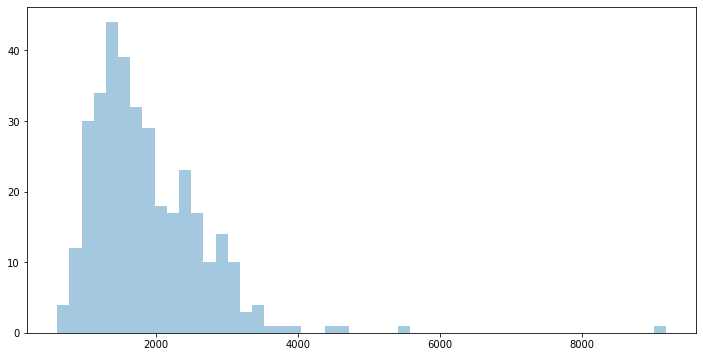

In [38]:
plt.hist(bbc1_tech['final_length'], alpha = 0.4, bins=bins, label='tech')

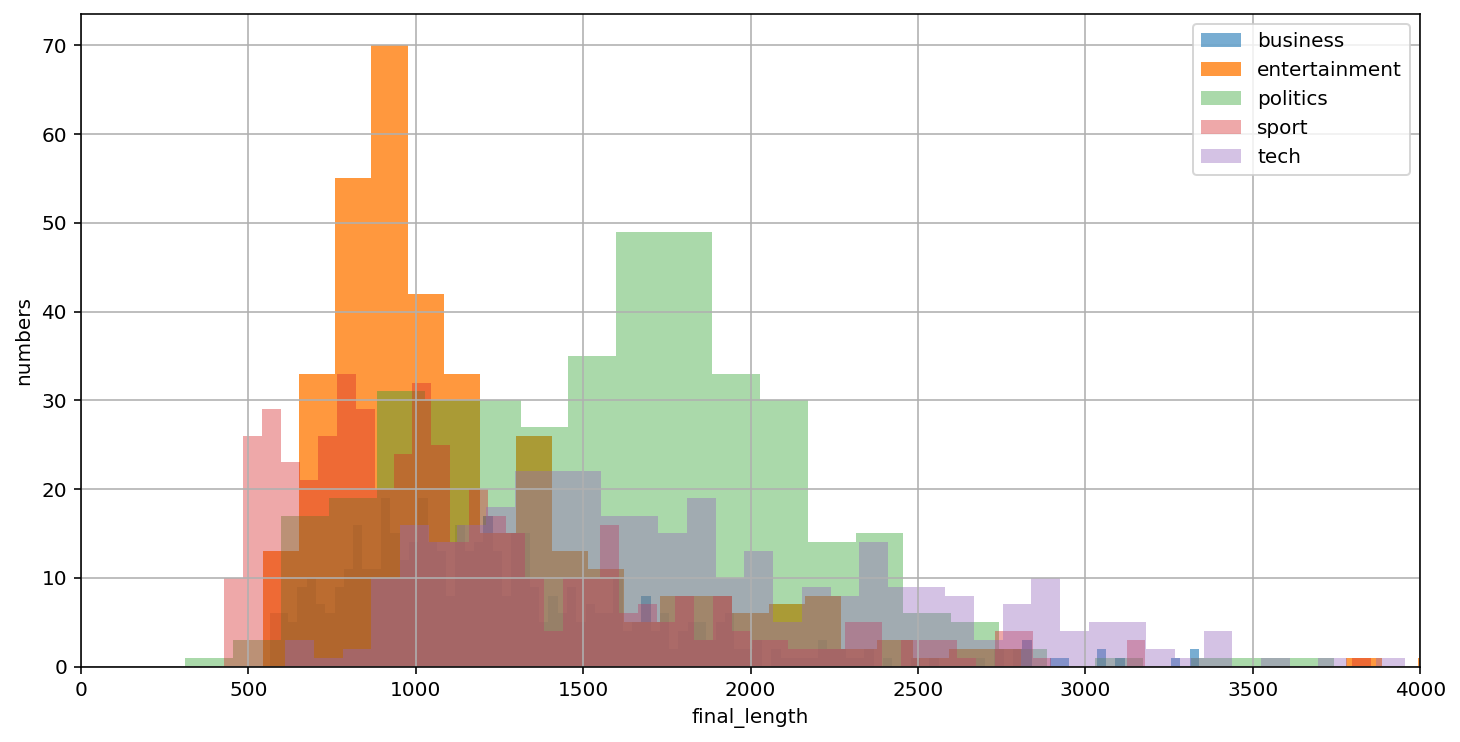

In [51]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc1_business['final_length'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['final_length'], alpha = 0.8, bins=bins, label='entertainment')
plt.hist(bbc1_politics['final_length'], alpha = 0.4, bins=bins, label='politics')
plt.hist(bbc1_sport['final_length'], alpha = 0.4, bins=bins, label='sport')
plt.hist(bbc1_tech['final_length'], alpha = 0.4, bins=bins, label='tech')
plt.xlabel('final_length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,4000)
plt.grid()
plt.show()

In [60]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [61]:
bbc1['tokenized_news'] = bbc1['news'].apply(text_process)

In [62]:
bbc1.head()

,news,topics,length,tokenized_news
0,"b'India calls for fair trade rules\n\nIndia, w...",business,1922,bIndia calls fair trade rulesnnIndia attends G...
1,"b'Steel firm \'to cut\' 45,000 jobs\n\nMittal ...",business,1620,bSteel firm cut 45000 jobsnnMittal Steel one w...
2,b'Call centre users \'lose patience\'\n\nCusto...,business,3854,bCall centre users lose patiencennCustomers tr...
3,b'Ethiopia\'s crop production up 24%\n\nEthiop...,business,1494,bEthiopias crop production 24nnEthiopia produc...
4,"b""Safety alert as GM recalls cars\n\nThe world...",business,1829,bSafety alert GM recalls carsnnThe worlds bigg...


In [63]:
bbc1.tokenized_news[0]

'bIndia calls fair trade rulesnnIndia attends G7 meeting seven leading industrialised nations Friday unlikely cowed newcomer statusnnIn London Thursday ahead meeting Indias finance minister lashed restrictive trade policies G7 nations objected subsidies agriculture make hard developing nations like India compete also called reform United Nations World Bank IMFnnPalaniappan Chidambaram Indias finance minister argued organisations need take account changing world order given India Chinas integration global economy said issue globalisation terms engagement globalisation Mr Chidambaram attending G7 meeting part G20 group nations account two thirds worlds population conference developing enterprise hosted UK finance minister Gordon Brown Friday said favour floating exchange rates help countries cope economic shocks flexible exchange rate one channel absorbing positive negative shocks told conference India along China Brazil South Africa Russia invited take part G7 meeting taking place Londo

In [55]:
from nltk.corpus import stopwords
sw=set(stopwords.words("english"))

In [64]:
ps=nltk.PorterStemmer()

In [65]:
# function for removing punctuation
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [66]:
# creating function for cleaning text

import re
import string

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [56]:
def stop_words(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [57]:
bbc1['news'] = bbc1['news'].apply(stop_words)
bbc1.head(10)

TypeError: ignored

In [31]:
# function for removing punctuation
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [ ]:
n_topics = 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df.text)

In [ ]:
df1 = pd.DataFrame(features.todense() , columns=vec.get_feature_names())